# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

# EDA

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

Text(0.5, 0, 'Class of Mushroom')

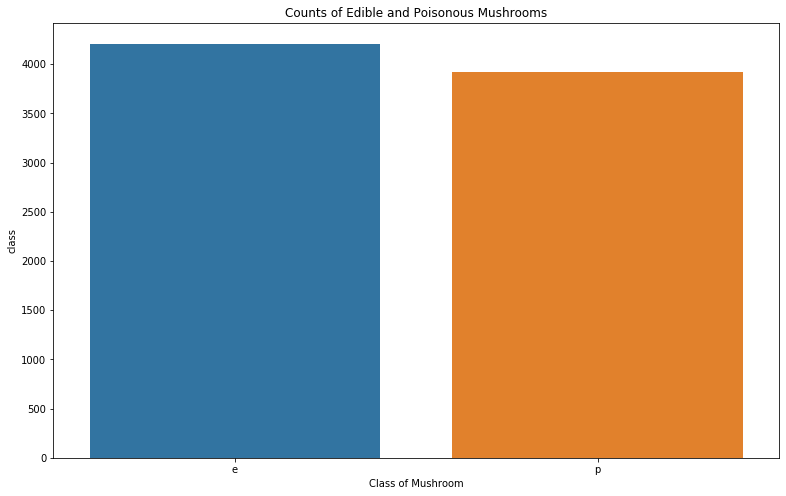

In [5]:
plt.figure(figsize=(13,8))
sns.barplot(x=df['class'].value_counts().index, y=df['class'].value_counts(), data=df)
plt.title("Counts of Edible and Poisonous Mushrooms")
plt.xlabel("Class of Mushroom")

Text(0.5, 0, 'Cap Color')

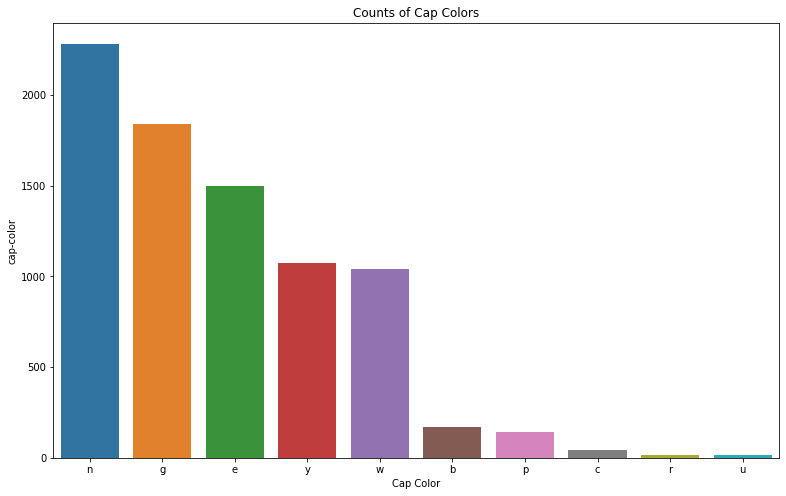

In [6]:
plt.figure(figsize=(13,8))
sns.barplot(x=df['cap-color'].value_counts().index, y=df['cap-color'].value_counts(), data=df)
plt.title("Counts of Cap Colors")
plt.xlabel("Cap Color")

In [7]:
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors = df['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

In [8]:
edible_cc = []
poisonous_cc = []
for capColor in cap_color_labels:
    size = len(df[df['cap-color'] == capColor].index)
    edibles = len(df[(df['cap-color'] == capColor) & (df['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)

In [16]:
cc = []
for i in set(df['cap-color']):
    cc.append(i)

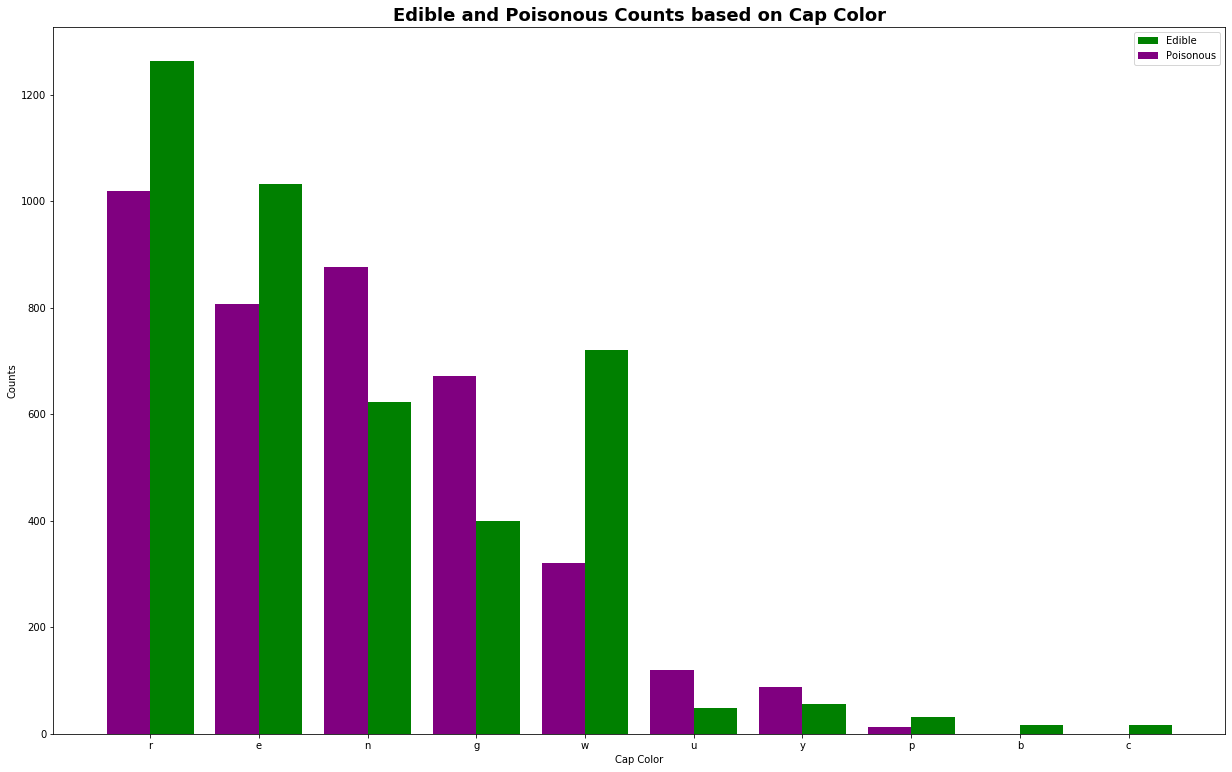

In [23]:
fig = plt.figure(figsize=(21,13))

ax = fig.add_subplot(111)
width = 0.4
ypos = np.arange(len(cc))
rects1 = ax.bar(ypos+0.2, edible_cc,width, color='green')
rects2 = ax.bar(ypos-0.2, poisonous_cc,width, color='purple')


ax.set_ylabel('Counts')
ax.set_xlabel('Cap Color')
ax.set_title('Edible and Poisonous Counts based on Cap Color', fontweight='bold',fontsize=18)
plt.xticks(ypos,cc)

ax.legend( (rects1[0], rects2[0]), ('Edible', 'Poisonous') )

plt.show()